In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 1: Reading the Dataset

In [ ]:
data = pd.read_csv("/content/Infected_Data.csv")
data


,ID,Fever,Cough,Breathing Issues,Infected
0,1,N,N,N,N
1,2,Y,Y,Y,Y
2,3,Y,Y,N,N
3,4,Y,N,Y,Y
4,5,Y,Y,Y,Y
5,6,N,Y,N,N
6,7,Y,N,Y,Y
7,8,Y,N,Y,Y
8,9,N,Y,Y,Y
9,10,Y,Y,N,Y


In [ ]:
data.drop("ID", axis=1, inplace=True)

### STEP 2: Finding the Entropy

In [ ]:
def entropy(target_col):
  values, counts = np.unique(target_col, return_counts=True)
  probabilities = counts/counts.sum()
  total_entropy = -np.sum(probabilities * np.log2(probabilities))
  print("Entropy is: ", total_entropy)
  return total_entropy

### STEP 3: Finding the Information Gain

In [ ]:
def info_gain(data, attribute, target):
  total_entropy = entropy(data[target])
  values, counts = np.unique(data[attribute], return_counts=True)
  weighted_entropy = np.sum([(counts[i]/counts.sum()) * entropy(data.where(data[attribute] == values[i]).dropna()[target]) for i in range(len(values))])
  return total_entropy - weighted_entropy
print("IG for Fever is: ", info_gain(data, "Fever", data.columns[-1]))
print("IG for Cough is: ", info_gain(data, "Cough", data.columns[-1]))
print("IG for Breathing Issues is: ", info_gain(data, "Breathing Issues", data.columns[-1]))

Entropy is:  0.9852281360342515
Entropy is:  0.9182958340544896
Entropy is:  0.8112781244591328
IG for Fever is:  0.12808527889139443
Entropy is:  0.9852281360342515
Entropy is:  0.8112781244591328
Entropy is:  1.0
IG for Cough is:  0.0391486719030707
Entropy is:  0.9852281360342515
Entropy is:  0.6500224216483541
Entropy is:  0.5435644431995964
IG for Breathing Issues is:  0.39603884492804464


### STEP 4: Build the Tree Recursively

In [ ]:
def build_tree(data, attributes, target):

  if len(np.unique(data[target])) == 1:
    return np.unique(data[target])[0]

  if len(attributes) == 0:
    return data[target].mode()[0]

  gains = [info_gain(data, attribute, target) for attribute in attributes]
  best_index = np.argmax(gains)
  best_attribute = attributes[best_index]

  tree = {best_attribute: {}}
  for value in np.unique(data[best_attribute]):
    subset = data[data[best_attribute] == value]
    new_attr = [attr for attr in attributes if attr != best_attribute]
    subtree = build_tree(subset, new_attr, target)
    tree[best_attribute][value] = subtree

  return tree

### STEP 5: Print the Tree

In [ ]:
def print_tree(tree, indent=""):
  if isinstance(tree, str):
    print(indent + "->" + tree)
    return

  for attr, branches in tree.items():
    print(indent + attr + "?")
    for value, subtree in branches.items():
      print(indent + f"|- {value}")
      print_tree(subtree, indent + "  ")

In [ ]:
tree = build_tree(data, data.columns[:-1], data.columns[-1])
print_tree(tree)

Entropy is:  0.9852281360342515
Entropy is:  0.9182958340544896
Entropy is:  0.8112781244591328
Entropy is:  0.9852281360342515
Entropy is:  0.8112781244591328
Entropy is:  1.0
Entropy is:  0.9852281360342515
Entropy is:  0.6500224216483541
Entropy is:  0.5435644431995964
Entropy is:  0.6500224216483541
Entropy is:  -0.0
Entropy is:  0.9182958340544896
Entropy is:  0.6500224216483541
Entropy is:  -0.0
Entropy is:  0.7219280948873623
Entropy is:  0.9182958340544896
Entropy is:  0.9182958340544896
Entropy is:  0.5435644431995964
Entropy is:  0.9182958340544896
Entropy is:  -0.0
Entropy is:  0.5435644431995964
Entropy is:  -0.0
Entropy is:  0.7219280948873623
Entropy is:  0.9182958340544896
Entropy is:  0.9182958340544896
Breathing Issues?
|- N
  Fever?
  |- N
    ->N
  |- Y
    Cough?
    |- Y
      ->N
|- Y
  Fever?
  |- N
    Cough?
    |- Y
      ->Y
  |- Y
    ->Y


### USING THE LIBRARY

In [ ]:
y

,Infected
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier()
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X['Breathing Issues'] = X['Breathing Issues'].replace({'Y':1, 'N':0})
X['Cough'] = X['Cough'].replace({'Y':1, 'N':0})
X['Fever'] = X['Fever'].replace({'Y':1, 'N':0})
y = y.replace({'Y':1, 'N':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

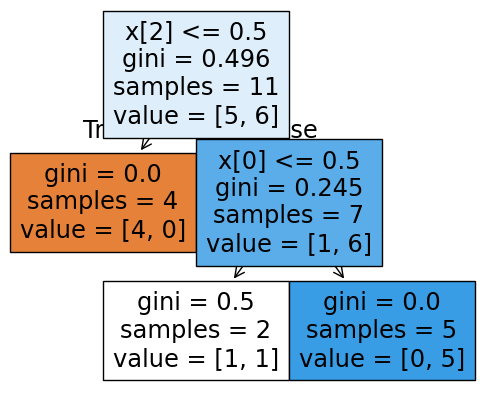

In [ ]:
from sklearn import tree
plt.figure(figsize=(6,5))
tree.plot_tree(dt, filled=True)

In [ ]:
y_pred = dt.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.3333333333333333
Confusion Matrix: 
 [[1 0]
 [2 0]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

